In [1]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn import metrics

from mlxtend.plotting import plot_confusion_matrix

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

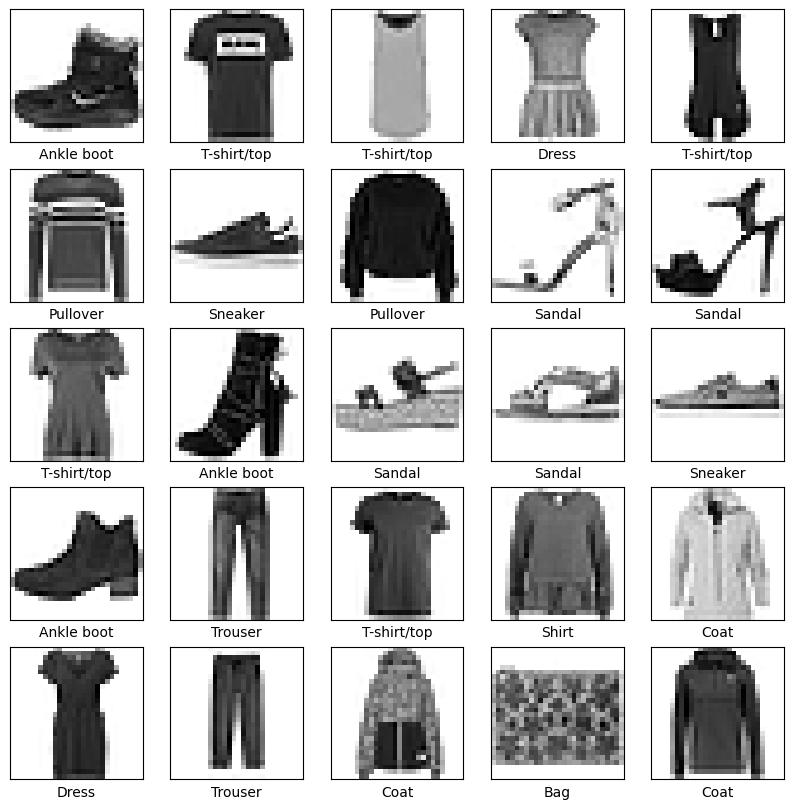

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', name='conv-layer-1', input_shape=(28, 28, 1)),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), name='pooling-layer-1'),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', name='conv-layer-2'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), name='pooling-layer-2'),
    tf.keras.layers.GlobalAveragePooling2D(name='pooling-layer-3'),
    tf.keras.layers.Dense(10, activation='softmax', name='output-layer')
])

In [9]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv-layer-1 (Conv2D)       (None, 26, 26, 64)        640       
                                                                 
 pooling-layer-1 (AveragePo  (None, 13, 13, 64)        0         
 oling2D)                                                        
                                                                 
 conv-layer-2 (Conv2D)       (None, 11, 11, 32)        18464     
                                                                 
 pooling-layer-2 (AveragePo  (None, 5, 5, 32)          0         
 oling2D)                                                        
                                                                 
 pooling-layer-3 (GlobalAve  (None, 32)                0         
 ragePooling2D)                                                  
                                                        

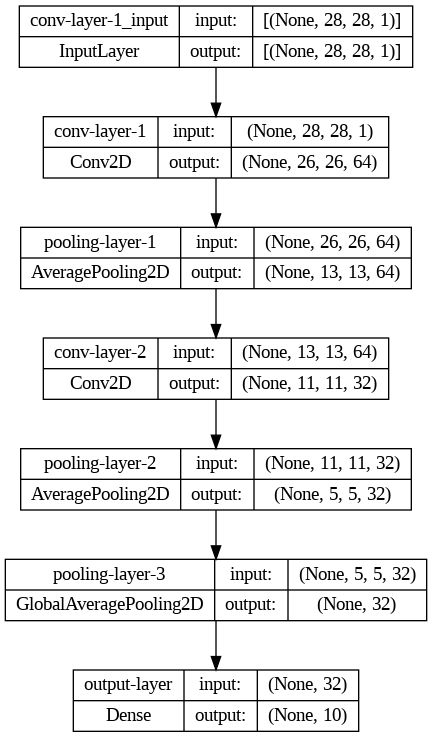

In [11]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [12]:

epochs = 10

In [13]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.0737 - accuracy: 0.6136 - val_loss: 0.8344 - val_accuracy: 0.6880
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7731 - accuracy: 0.7191 - val_loss: 0.7520 - val_accuracy: 0.7277
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7072 - accuracy: 0.7423 - val_loss: 0.6865 - val_accuracy: 0.7558
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6567 - accuracy: 0.7615 - val_loss: 0.6548 - val_accuracy: 0.7607
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6192 - accuracy: 0.7769 - val_loss: 0.6427 - val_accuracy: 0.7744
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5861 - accuracy: 0.7904 - val_loss: 0.5901 - val_accuracy: 0.7905
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5575 - accuracy: 0.8022 - val_loss: 0.5765 - val_accuracy:

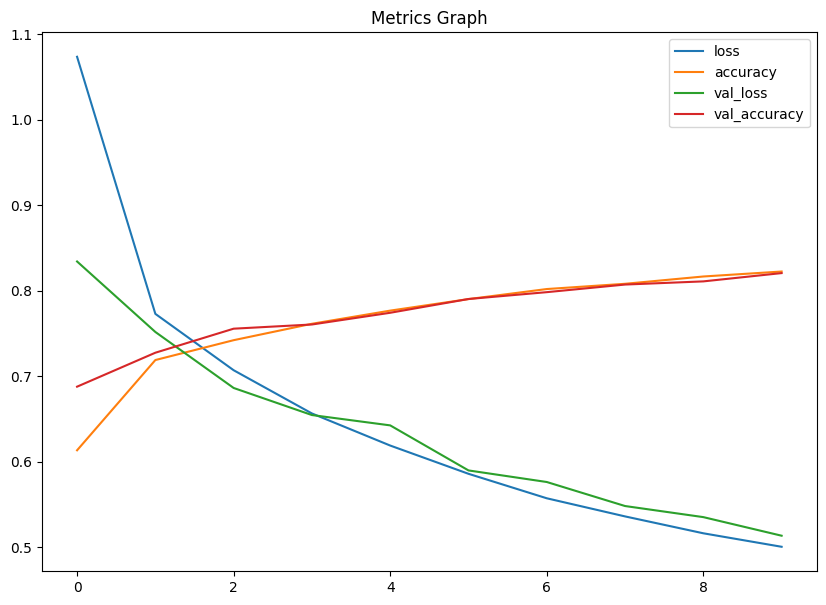

In [14]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics Graph")
plt.show()

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5137 - accuracy: 0.8208


[0.5137457251548767, 0.8208000063896179]

In [16]:
predictions = model.predict(x_test)
predictions = tf.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


In [17]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1000
           1       0.99      0.94      0.96      1000
           2       0.76      0.69      0.72      1000
           3       0.78      0.86      0.82      1000
           4       0.67      0.75      0.71      1000
           5       0.94      0.94      0.94      1000
           6       0.51      0.47      0.49      1000
           7       0.88      0.94      0.91      1000
           8       0.96      0.94      0.95      1000
           9       0.95      0.91      0.93      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



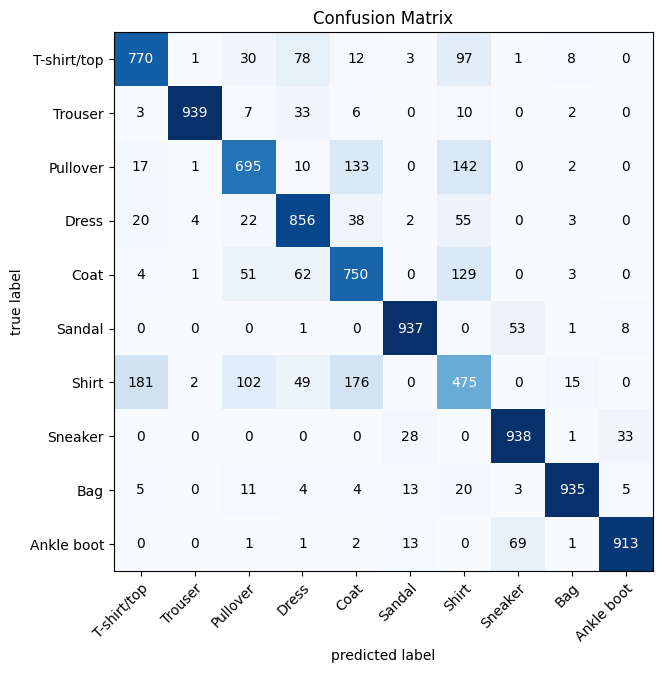

In [18]:
cm = metrics.confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, figsize=(10,7), class_names=class_names)
plt.title("Confusion Matrix")
plt.show()